# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

## Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)

In [3]:
# Check out features
X, X.shape

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 (1000, 2))

We have 2 columns

In [4]:
# Check the labels (first 10 values)
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [5]:
np.unique(y)

array([0, 1])

This is a binary classification problem.

Our data is a little hard to understand right now... let's visualize it!

In [6]:
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [7]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

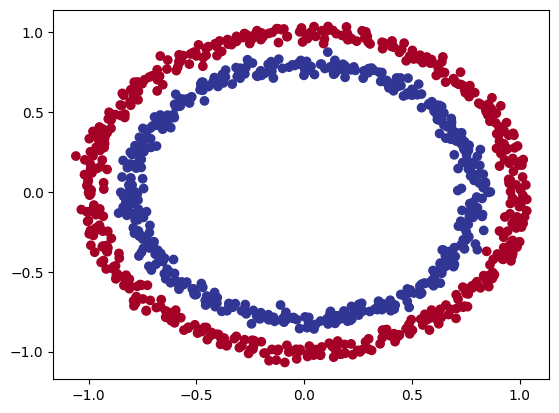

In [8]:
# Visualize with a plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

🛠 **Exercise:** Before pushing forward, spend 10 minutes playing around with [playground.tensorlow.org](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.00227&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) building and running different neural networks. See what happens when you change different hyperparameters.

## Input and output shapes

In [9]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [11]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Complie the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [12]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=tf.keras.metrics.BinaryAccuracy())

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 2s 7ms/step - loss: 5.6332 - binary_accuracy: 0.4860
Epoch 2/5
32/32 [==============================] - 0s 9ms/step - loss: 4.6972 - binary_accuracy: 0.4690
Epoch 3/5
32/32 [==============================] - 0s 11ms/step - loss: 4.2126 - binary_accuracy: 0.5040
Epoch 4/5
32/32 [==============================] - 0s 10ms/step - loss: 3.9409 - binary_accuracy: 0.5190
Epoch 5/5
32/32 [==============================] - 0s 7ms/step - loss: 3.0525 - binary_accuracy: 0.5100


In [13]:
# Let's try and improve our model by training for longer...
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - binary_accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [14]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=tf.keras.metrics.BinaryAccuracy())

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [15]:
model_2.evaluate(X, y)

32/32 [==============================] - 1s 5ms/step - loss: 0.6933 - binary_accuracy: 0.5000


[0.6933414340019226, 0.5]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer).

In [16]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile a model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=tf.keras.metrics.BinaryAccuracy())

# 3. Fit a model
model_3.fit(X, y, epochs=100, verbose=0)

In [17]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6960 - binary_accuracy: 0.5060


[0.6960235834121704, 0.5059999823570251]

In [18]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1321 (5.16 KB)
Trainable params: 1321 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Video N°78

🔑 **Note:** Whenever your model is performing strangely or there's something going on with your data you're not quite sure of, remember these three words: **visualize, visualize, visualize**. INspect your data, inspect your model, inspect your model's predictions.

To visualize our model's predictions, let's create a function `plot_decision-boudary()`, this function will:
* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls).

In [19]:
from MachineLearningUtils.data_visualization.prediction_visualization import plot_decision_boundary

313/313 [==============================] - 1s 4ms/step
doing binary classification


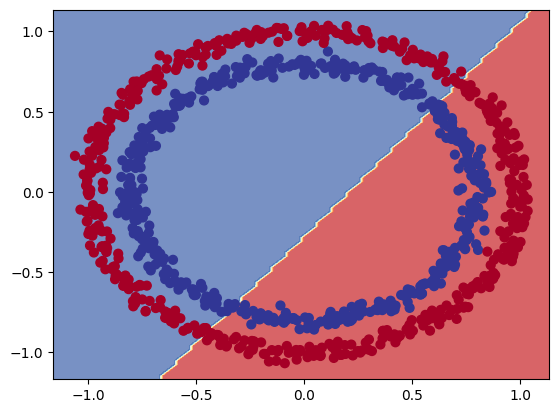

In [20]:
# check out the predictions our model is macking
plot_decision_boundary(model=model_3, X=X, y=y)

In [21]:
# Let's see if our model can be used for a regression problem...
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model
#model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Oh wait... we compiled our model for a binary classification problem.
But... we're now on a regression problem, let's change the model to suit our data.

In [22]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mean_absolute_error,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=tf.keras.metrics.mean_absolute_error)

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 7ms/step - loss: 540.8306 - mean_absolute_error: 540.8306
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 434.7790 - mean_absolute_error: 434.7790
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 334.5758 - mean_absolute_error: 334.5758
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 231.2092 - mean_absolute_error: 231.2092
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 123.2979 - mean_absolute_error: 123.2979
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 51.1332 - mean_absolute_error: 51.1332
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 80.6365 - mean_absolute_error: 80.6365
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 71.3411 - mean_absolute_error: 71.3411
Epoch 9/100
5/5 [==============================] - 0s 7ms/step - loss: 46.9541 - mean_absolute_error: 46.9541


2/2 [==============================] - 0s 7ms/step


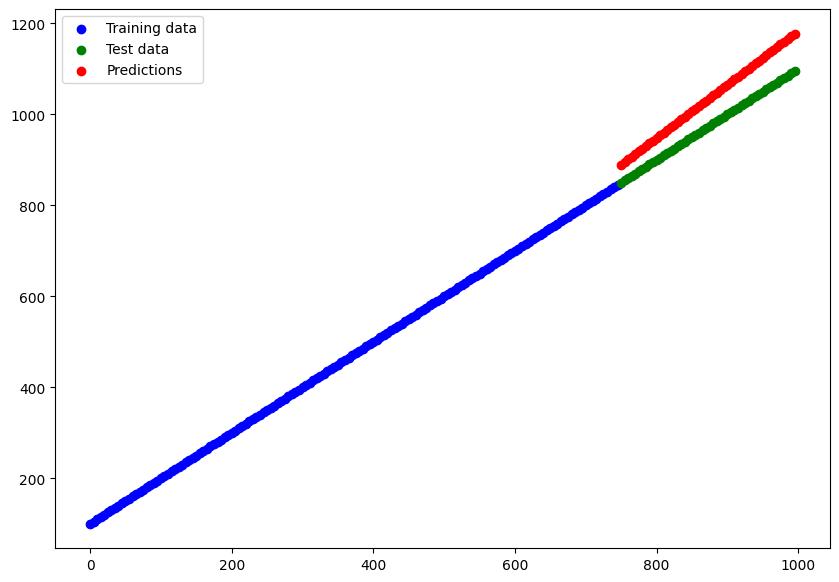

In [23]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend()

Video N° 81

## The missing piece: Non-linearity

In [24]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear) # or activation="linear"
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=tf.keras.metrics.BinaryAccuracy())

# Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 5.9034 - binary_accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 5.8715 - binary_accuracy: 0.4810
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8554 - binary_accuracy: 0.4810
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8216 - binary_accuracy: 0.4800
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 5.8072 - binary_accuracy: 0.4810
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7870 - binary_accuracy: 0.4790
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 5.7522 - binary_accuracy: 0.4800
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 5.7484 - binary_accuracy: 0.4790
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 5.7232 - binary_accuracy: 0.4800
Epoch 10/100
32/32 [==========================

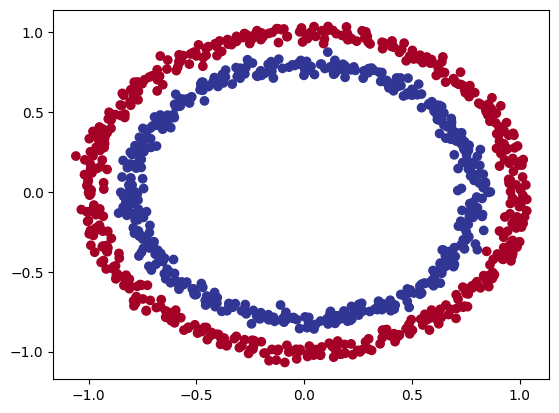

In [25]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 1s 3ms/step
doing binary classification


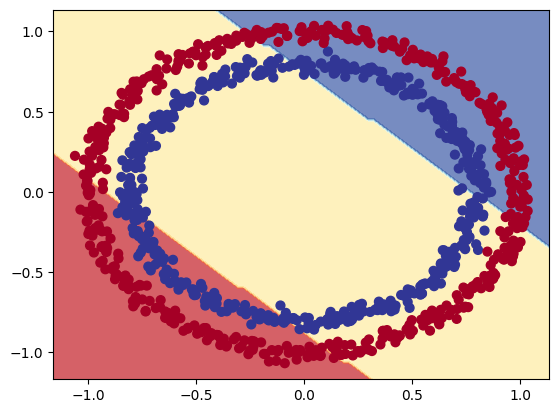

In [26]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4, X=X, y=y)

Video N°82

Let's try build our first neural network with a non-linear activation function

```
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])
```
or below

In [27]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activations
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=tf.keras.metrics.BinaryAccuracy())

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 5.9630 - binary_accuracy: 0.4860
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9475 - binary_accuracy: 0.4850
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 5.8828 - binary_accuracy: 0.4870
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8560 - binary_accuracy: 0.4820
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 5.8255 - binary_accuracy: 0.4820
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 5.8076 - binary_accuracy: 0.4810
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 5.8032 - binary_accuracy: 0.4800
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 5.8006 - binary_accuracy: 0.4810
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 5.7912 - binary_accuracy: 0.4820
Epoch 10/100
32/32 [==========================

Video N°83

In [28]:
# Time to replicate the multi-layer neural network from TensorFlow playground in code...

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=tf.keras.metrics.BinaryAccuracy())

# Fit the model
history = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 3s 5ms/step - loss: 1.8081 - binary_accuracy: 0.4390
Epoch 2/250
32/32 [==============================] - 0s 6ms/step - loss: 1.3202 - binary_accuracy: 0.4680
Epoch 3/250
32/32 [==============================] - 0s 6ms/step - loss: 1.2071 - binary_accuracy: 0.4720
Epoch 4/250
32/32 [==============================] - 0s 8ms/step - loss: 1.1322 - binary_accuracy: 0.4760
Epoch 5/250
32/32 [==============================] - 0s 6ms/step - loss: 1.0413 - binary_accuracy: 0.4790
Epoch 6/250
32/32 [==============================] - 0s 7ms/step - loss: 0.9481 - binary_accuracy: 0.4760
Epoch 7/250
32/32 [==============================] - 0s 6ms/step - loss: 0.8968 - binary_accuracy: 0.4770
Epoch 8/250
32/32 [==============================] - 0s 5ms/step - loss: 0.8624 - binary_accuracy: 0.4770
Epoch 9/250
32/32 [==============================] - 0s 6ms/step - loss: 0.8348 - binary_accuracy: 0.4830
Epoch 10/250
32/32 [==========================

In [29]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.0366 - binary_accuracy: 0.9880


[0.03658989816904068, 0.9879999756813049]

313/313 [==============================] - 1s 3ms/step
doing binary classification


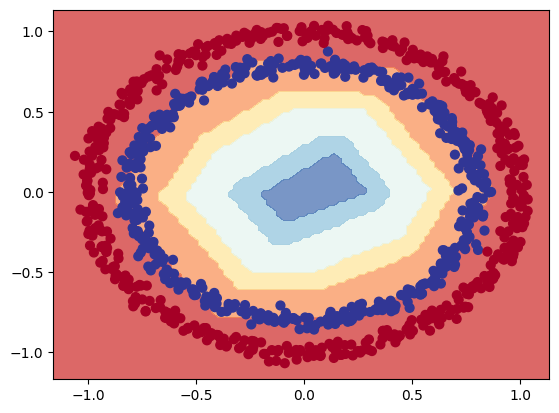

In [30]:
# How do our model predictions look?
plot_decision_boundary(model=model_6, X=X, y=y)

Video N°84

In [31]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=tf.keras.metrics.BinaryAccuracy())

# 3. Fit the model
history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 5ms/step - loss: 0.6949 - binary_accuracy: 0.4980
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6930 - binary_accuracy: 0.4990
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6919 - binary_accuracy: 0.5040
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6909 - binary_accuracy: 0.5030
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6902 - binary_accuracy: 0.5120
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6891 - binary_accuracy: 0.5230
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6877 - binary_accuracy: 0.5290
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6867 - binary_accuracy: 0.5330
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6853 - binary_accuracy: 0.5530
Epoch 10/100
32/32 [==========================

In [32]:
# 4. Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.3613 - binary_accuracy: 0.9150


[0.36130470037460327, 0.9150000214576721]

313/313 [==============================] - 1s 3ms/step
doing binary classification


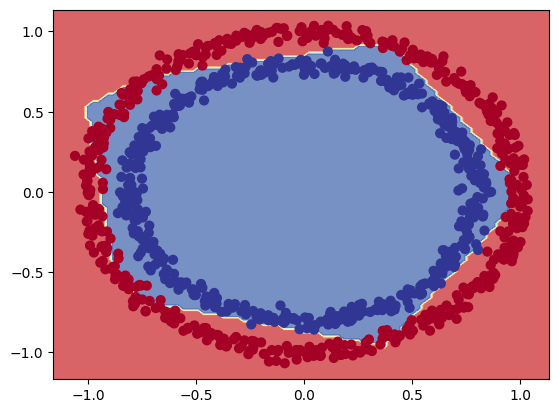

In [33]:
# Let's visualize our incredible metrics
plot_decision_boundary(model=model_7, X=X, y=y)

🤔 **Question:** What's wrong the predictions we've made? Are we really evaluating our model correctly? Hint: what data did the model learn on and what data did we predict on?

🔑 **Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Video N° 85: Non-linearity part 5: Replicating non-linear activation functions from scratch

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action.

In [34]:
# Create a toy a tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(start=-10, limit=10), dtype=tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

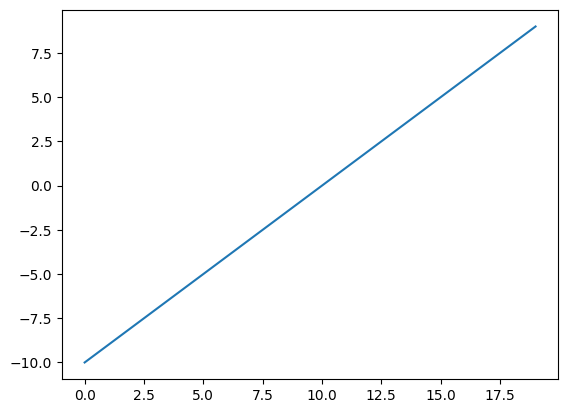

In [35]:
# Visualize our toy tensor
plt.plot(A)

In [36]:
# Let's start by replicating sigmoid - sigmoid(X) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.math.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

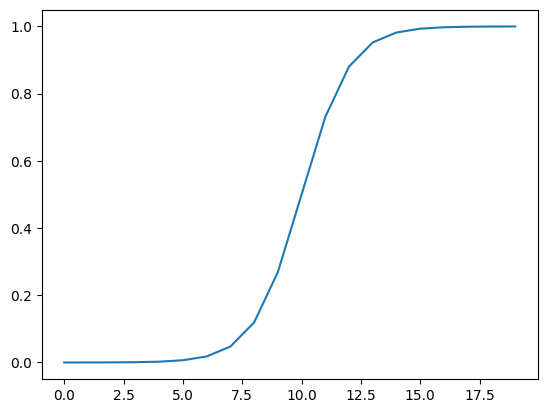

In [37]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [38]:
# Let's recreate the relu function
def relu(x):
  return tf.math.maximum(0, x)
## Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

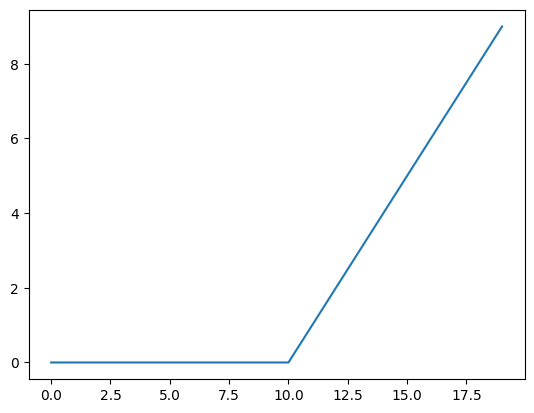

In [39]:
# PLot ReLU-modified tensor
plt.plot(relu(A))

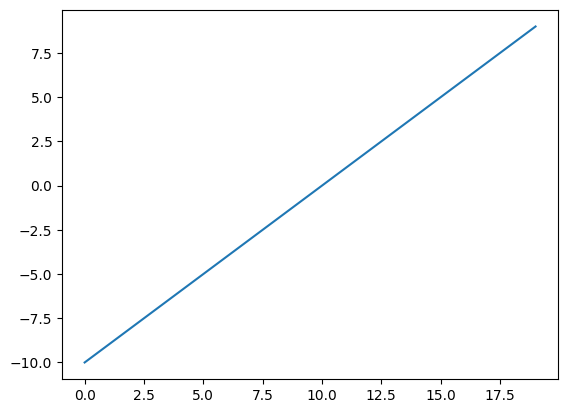

In [40]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A))

In [41]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

Video N° 86: Getting great results in less time by tweaking the learning rate

## Evaluating and improving our classification model

So far we've been training and testing on the same dataset...
However, in machine learning this is basically a sin.
So let's create a training and test set.

In [42]:
# Check how many example we have
len(X)

1000

In [43]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [44]:
# Let's recreate a model to fit on the training data and evaluate on the testing data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # or activation="relu"
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # or activation="relu"
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # or activation="sigmoid"
])

# 2. Compile the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=tf.keras.metrics.BinaryAccuracy())

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6862 - binary_accuracy: 0.5550
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6755 - binary_accuracy: 0.6025
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6695 - binary_accuracy: 0.5700
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6671 - binary_accuracy: 0.5763
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6640 - binary_accuracy: 0.6075
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6573 - binary_accuracy: 0.5650
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6539 - binary_accuracy: 0.6212
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6481 - binary_accuracy: 0.5975
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6310 - binary_accuracy: 0.6313
Epoch 10/25
25/25 [==============================] - 0s

In [45]:
# 4. Evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0577 - binary_accuracy: 0.9900


[0.05774068832397461, 0.9900000095367432]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


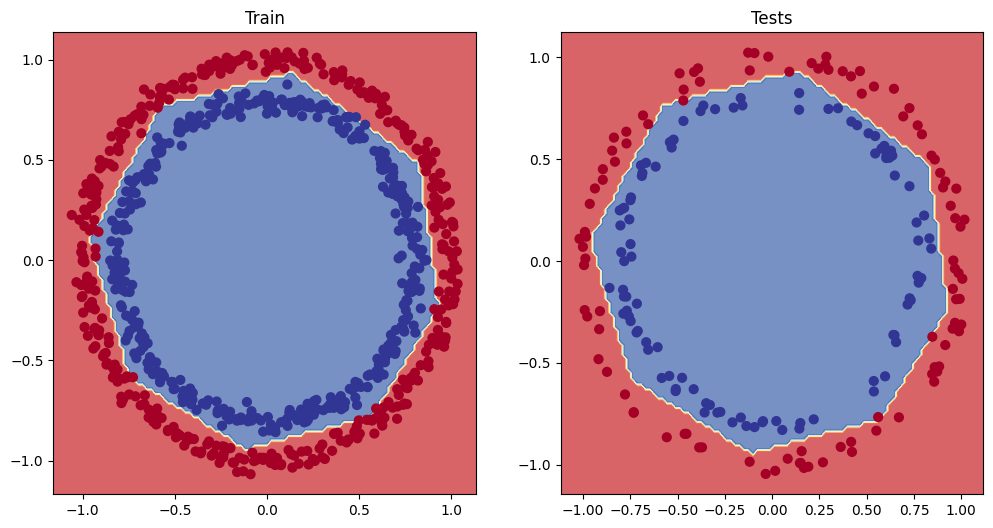

In [46]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model=model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Tests")
plot_decision_boundary(model=model_8, X=X_test, y=y_test)
plt.show()

Video N°87: Using the TensorFlow History object to plot a model's loss curves

## Plot the loss (or training) curves

In [47]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,binary_accuracy
0,0.686200,0.55500
1,0.675524,0.60250
2,0.669463,0.57000
3,0.667055,0.57625
4,0.663989,0.60750
5,0.657327,0.56500
6,0.653886,0.62125
7,0.648054,0.59750
8,0.630962,0.63125
9,0.601087,0.72750


Text(0.5, 1.0, 'Model_8 loss curves')

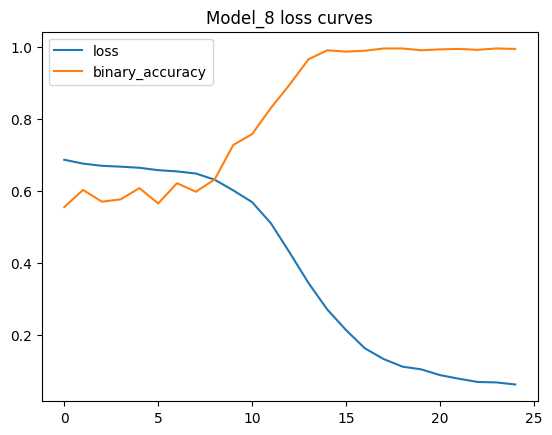

In [48]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

🔑 **Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

Video N°88: Using callbacks to find a model's ideal learning rate

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your *while* its training.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.

In [49]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# Compile the model
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=tf.keras.metrics.BinaryAccuracy())

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7014 - binary_accuracy: 0.4863 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7011 - binary_accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7008 - binary_accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7004 - binary_accuracy: 0.4988 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7000 - binary_accuracy: 0.4988 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6996 - binary_accuracy: 0.5000 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6991 - binary_accuracy: 0.4975 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6986 - binary_accuracy: 0.4988 - lr: 2.2387e-04
Epoch 9/100
25/2

<Axes: xlabel='epochs'>

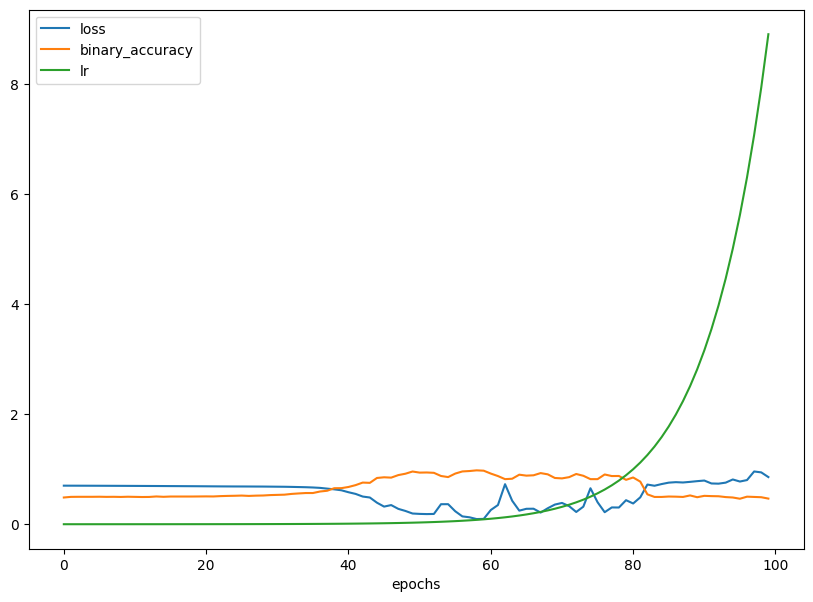

In [50]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs. Loss')

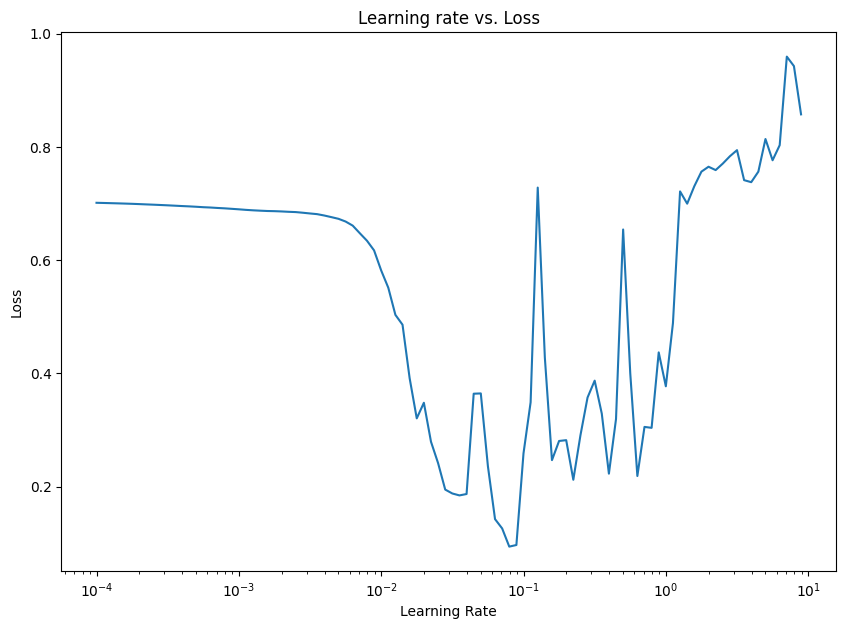

In [51]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")

In [52]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [53]:
# Learning rate we used before (model_8)
10**-2

0.01

Video N°89: Training and evaluating a model with an ideal learning rate

In [54]:
# Let's try using a higher *ideal* learning rate with the same model as before

# Set random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# Compile the model with the ideal learning rate
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=tf.keras.metrics.BinaryAccuracy())

# Fit the model for 20  (5 less than before)
history_10 = model_10.fit(X_train, y_train, epochs=20)


Epoch 1/20
25/25 [==============================] - 2s 8ms/step - loss: 0.6798 - binary_accuracy: 0.5962
Epoch 2/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6682 - binary_accuracy: 0.5713
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6561 - binary_accuracy: 0.5975
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6400 - binary_accuracy: 0.6538
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6225 - binary_accuracy: 0.6513
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5996 - binary_accuracy: 0.7150
Epoch 7/20
25/25 [==============================] - 0s 4ms/step - loss: 0.5742 - binary_accuracy: 0.7475
Epoch 8/20
25/25 [==============================] - 0s 6ms/step - loss: 0.5348 - binary_accuracy: 0.7625
Epoch 9/20
25/25 [==============================] - 0s 8ms/step - loss: 0.4944 - binary_accuracy: 0.7925
Epoch 10/20
25/25 [==============================] - 0s

In [55]:
# Evaluate model 10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0561 - binary_accuracy: 0.9850


[0.056126274168491364, 0.9850000143051147]

In [56]:
# Evaluate model 8 on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0577 - binary_accuracy: 0.9900


[0.05774068832397461, 0.9900000095367432]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


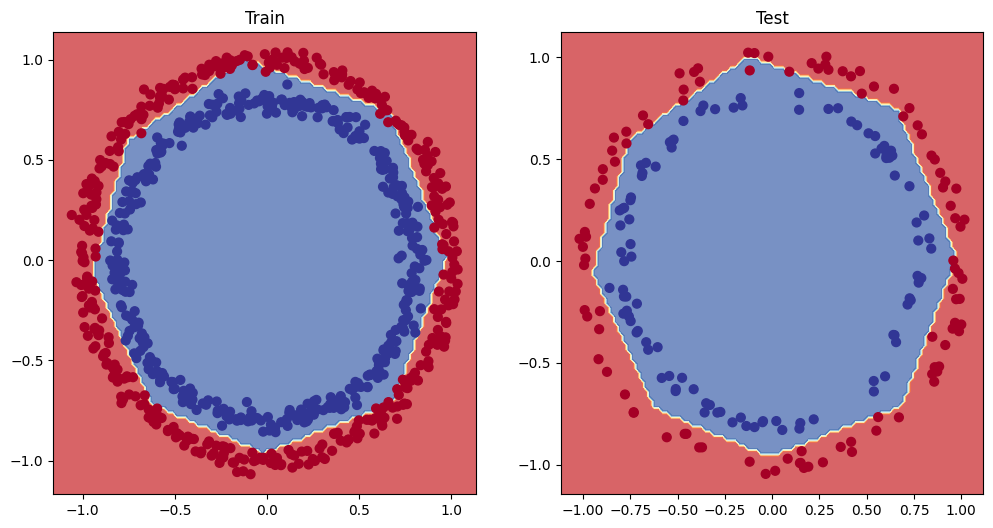

In [57]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model=model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model=model_10, X=X_test, y=y_test)
plt.show()

Video N°90: Introducing more classification evaluation methods

Video N°91: Finding the accuracy of our classification model

## More classification evaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn) - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [58]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 4ms/step - loss: 0.0561 - binary_accuracy: 0.9850
Model loss on the test set: 0.056126274168491364
Model accuracy on the test set: 98.50%


Video N°92: Creating our first confusion matrix (to see where our model is getting

How about a confusion matrix?

In [59]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
# confusion_matrix(y_test, y_preds) # don't work! See why below

7/7 [==============================] - 0s 3ms/step


In [60]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [61]:
y_preds[:10]

array([[0.9993238 ],
       [0.9986771 ],
       [0.99684536],
       [0.9981877 ],
       [0.34344277],
       [0.01084289],
       [0.9961324 ],
       [0.00213669],
       [0.99897516],
       [0.00532565]], dtype=float32)

Oops... looks like our predictions array has come out in **prediction probability** form... the standard output from the sigmoid (or softmax) activation functions.

In [62]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [63]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[98,  3],
       [ 0, 99]])

Video N°93: Making our confusion matrix prettier

How about we prettify our confusion matrix?

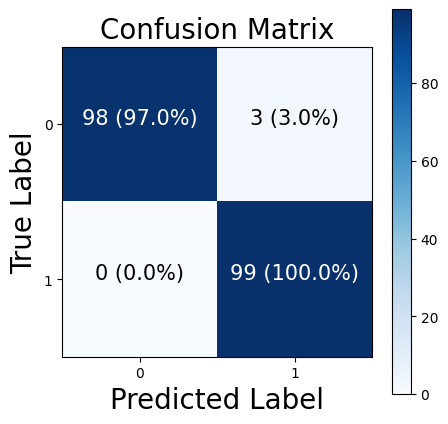

In [64]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

import itertools

figsize = (5, 5)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)


Video N°94: Putting things together with multi-class classification part 1: Getting the data

# Working with a larger example (multiclass classification)

When you have more then two classes as an option, it's known as **multi-class classification**.
* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification.

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.

In [65]:
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [66]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [67]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

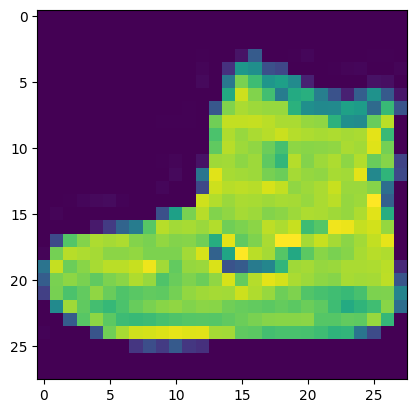

In [68]:
# Plot a single sample
plt.imshow(train_data[0])

In [69]:
# Check out sample label
train_labels[0]

9

En effet, selon la source https://github.com/zalandoresearch/fashion-mnist?tab=readme-ov-file#labels , en 9 nous avons "Ankle boot"

Video N°95: Multi-class classification part 2: Becoming one with the data

In [70]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal",
               "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

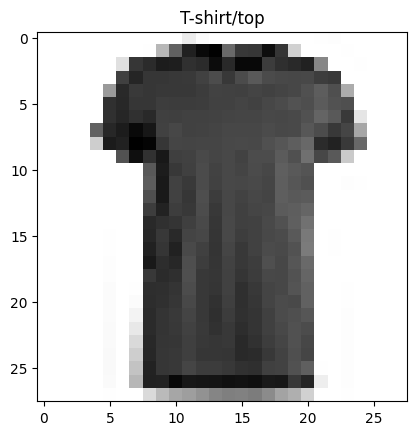

In [71]:
# Plot an example image and its label
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

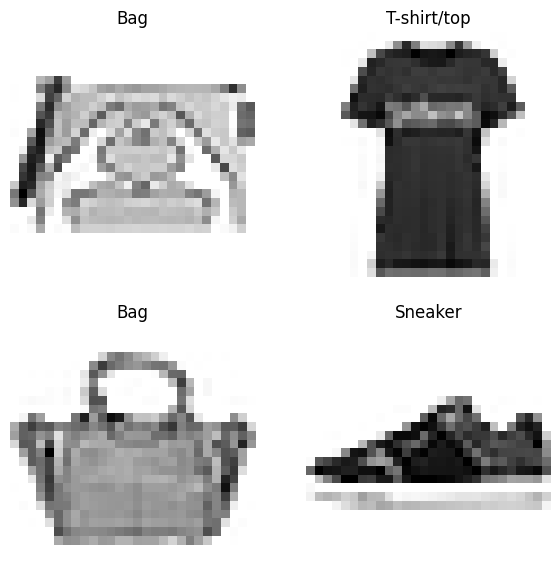

In [72]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

Video N°96: Multi-class classification part 3: Building a multi-class classification

## Building a multi-class classification model:

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
  * If your labels are one-hot encoded, use CategoricalCrossentropy()
  * If your labels are integer form use CategorcialCrossentropy()
* Output layer activation = Softmax (not sigmoid)
```
train_data[0].shape
>>> (28, 28)
len(class_names)
>>> 10
```

In [73]:
# our data needs to be flattened (from 28*28 to None, 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output.shape

TensorShape([None, 784])

Doc from **tf.keras.losses.CategoricalCrossentropy**:<br>
Use this crossentropy loss function when there are two or more classes. We expect labels to be provided in a `one_hot` representation. If you want to provide labels as integers, please use **SparceCatergoricalCrossentropy** loss. There should be `# classes` floating point values per feature.

### Version one-hot encoded
```
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=tf.keras.metrics.CategoricalAccuracy())

# Fit the model
non_norm_history = model_11.fit(train_data,
                                tf.one_hot(train_labels, depth=10),
                                epochs=10,
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10)))
```

### Version integers labels

In [74]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=tf.keras.metrics.SparseCategoricalAccuracy())

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 2.7174 - sparse_categorical_accuracy: 0.0978 - val_loss: 2.3038 - val_sparse_categorical_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3030 - sparse_categorical_accuracy: 0.0984 - val_loss: 2.3027 - val_sparse_categorical_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.1002 - val_loss: 2.3027 - val_sparse_categorical_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - sparse_categorical_accuracy: 0.0975 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - sparse_categorical_accuracy: 0.0973 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - spa

Video N°97: Multi-class classification part 4: Improving performance with normalisation

In [75]:
# Check the model summary
model_11.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 4)                 3140      
                                                                 
 dense_27 (Dense)            (None, 4)                 20        
                                                                 
 dense_28 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [76]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 & 1.

In [77]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [78]:
# Now our data is normalized, let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_11)
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=tf.keras.metrics.SparseCategoricalAccuracy())

# Fit the model
norm_history = model_12.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0975 - sparse_categorical_accuracy: 0.5827 - val_loss: 0.7381 - val_sparse_categorical_accuracy: 0.7375
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6802 - sparse_categorical_accuracy: 0.7546 - val_loss: 0.6845 - val_sparse_categorical_accuracy: 0.7542
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6254 - sparse_categorical_accuracy: 0.7816 - val_loss: 0.6308 - val_sparse_categorical_accuracy: 0.7828
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5947 - sparse_categorical_accuracy: 0.7942 - val_loss: 0.6285 - val_sparse_categorical_accuracy: 0.7820
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5769 - sparse_categorical_accuracy: 0.8008 - val_loss: 0.5876 - val_sparse_categorical_accuracy: 0.7985
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5635 - spars

> 🔑 **Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1).

Video N°98: Multi-class classifiaction part 5: Comparing normalized and non-normalized data

<Axes: title={'center': 'Normalized data'}>

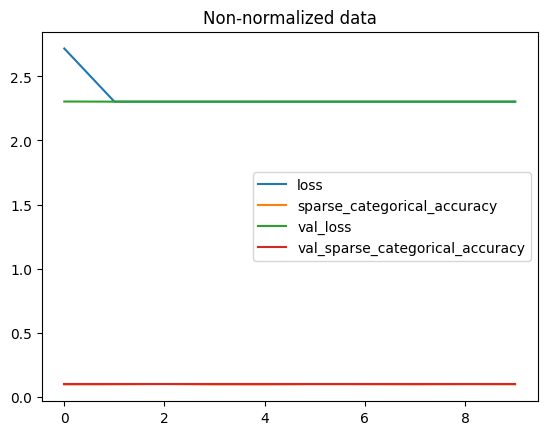

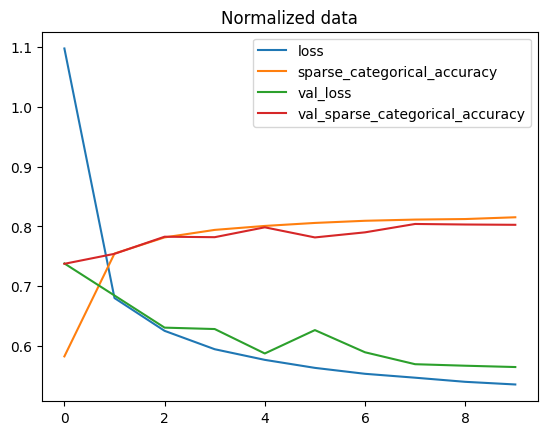

In [79]:
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

> 🔑 **Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing then on the same criteria (e.g. same architecture but different data or same data but different architecture).

Video N°99: Multi-class classification part 6: Finding the ideal learning rate

In [80]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=tf.keras.metrics.SparseCategoricalAccuracy())

# Creat the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.5828 - sparse_categorical_accuracy: 0.3740 - val_loss: 1.3330 - val_sparse_categorical_accuracy: 0.4526 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2631 - sparse_categorical_accuracy: 0.4710 - val_loss: 1.1522 - val_sparse_categorical_accuracy: 0.5498 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0139 - sparse_categorical_accuracy: 0.5683 - val_loss: 0.9732 - val_sparse_categorical_accuracy: 0.5762 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8827 - sparse_categorical_accuracy: 0.6502 - val_loss: 0.8552 - val_sparse_categorical_accuracy: 0.6838 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8048 - sparse_categorical_accuracy: 0.6941 - val_loss: 0.7857 - val_sparse_categorical_accuracy: 0.7163 - lr: 0.0016
Epoch 6/40
1875/1875 [===

In [1]:
# Plot the learning rate decay curve
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

NameError: name 'tf' is not defined

In [82]:
# Let's refit a model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),
])

# Compile model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=tf.keras.metrics.SparseCategoricalCrossentropy())

# Fit the model
history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.0268 - sparse_categorical_crossentropy: 1.0268 - val_loss: 0.7281 - val_sparse_categorical_crossentropy: 0.7281
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6438 - sparse_categorical_crossentropy: 0.6438 - val_loss: 0.6307 - val_sparse_categorical_crossentropy: 0.6307
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5808 - sparse_categorical_crossentropy: 0.5808 - val_loss: 0.6133 - val_sparse_categorical_crossentropy: 0.6133
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5598 - sparse_categorical_crossentropy: 0.5598 - val_loss: 0.5789 - val_sparse_categorical_crossentropy: 0.5789
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5457 - sparse_categorical_crossentropy: 0.5457 - val_loss: 0.5750 - val_sparse_categorical_crossentropy: 0.5750
Epoch 6/20
1875/1875 [============================

Video N°100: Multi-class classification part 7: Evaluating our model

## Evaluating our multi-class classification model

To evaluate our multi-class classifiaction model we could:
* Evaluate its performance using other classification metrics (such as a confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

Let's go through the top 2...

In [84]:
# Create a confusion matrix
from MachineLearningUtils.data_visualization.evaluation_metrics import make_confusion_matrix

In [85]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [86]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm) # probs is short for "prediction probabilities"

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[8.87725946e-06, 1.68233928e-05, 1.79501455e-07, 2.73671048e-03,
        1.37844891e-05, 2.57329136e-01, 1.14250724e-05, 1.15857951e-01,
        8.71988304e-04, 6.23153150e-01],
       [3.16101359e-04, 2.23855023e-09, 9.25176203e-01, 2.81111919e-04,
        7.46899750e-03, 2.97651567e-25, 6.67565241e-02, 1.44182878e-38,
        1.13534861e-06, 1.54011874e-33],
       [1.18610762e-04, 9.99662399e-01, 2.46121817e-06, 7.37701121e-05,
        1.25680119e-04, 1.53589231e-26, 1.71442716e-05, 8.83028357e-36,
        1.38275266e-14, 8.33601440e-21],
       [3.70784824e-06, 9.99366462e-01, 2.36165985e-08, 5.89696516e-04,
        3.96724790e-05, 4.52900409e-21, 4.64316543e-07, 2.56400438e-29,
        7.17938892e-14, 1.88452633e-14],
       [2.02353731e-01, 2.32363527e-04, 1.21399194e-01, 3.02491225e-02,
        1.29544269e-02, 2.63675935e-14, 6.32209063e-01, 9.98815730e-19,
        6.02138694e-04, 7.96554389e-16]], dtype=float32)

> 🔑 **Note:** Remember to make predictions on the same kind of data your model was trained on (e.g. if your model was trained on normalized data, you'll want to make predictions on normalized data).

In [87]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([8.8772595e-06, 1.6823393e-05, 1.7950146e-07, 2.7367105e-03,
        1.3784489e-05, 2.5732914e-01, 1.1425072e-05, 1.1585795e-01,
        8.7198830e-04, 6.2315315e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [88]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [89]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

Video N°101: Multi-class classifiaction part 8: Creating a confusion matrix

In [90]:
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[740,   8,   7,  54,   8,   0, 165,   0,  18,   0],
       [  2, 951,   1,  27,  13,   1,   3,   0,   2,   0],
       [  9,   2, 551,   8, 226,   1, 200,   0,   3,   0],
       [ 21,  12,   6, 841,  47,   0,  61,   0,  12,   0],
       [  0,   1,  66,  30, 840,   1,  62,   0,   0,   0],
       [  1,   0,   0,   0,   0, 906,   0,  44,  16,  33],
       [133,   4, 110,  39, 175,   1, 514,   0,  24,   0],
       [  0,   0,   0,   0,   0,  37,   0, 933,   2,  28],
       [  2,   0,   3,   9,   6,  11,  48,   5, 916,   0],
       [  0,   0,   0,   1,   0,  26,   0,  49,   2, 922]])

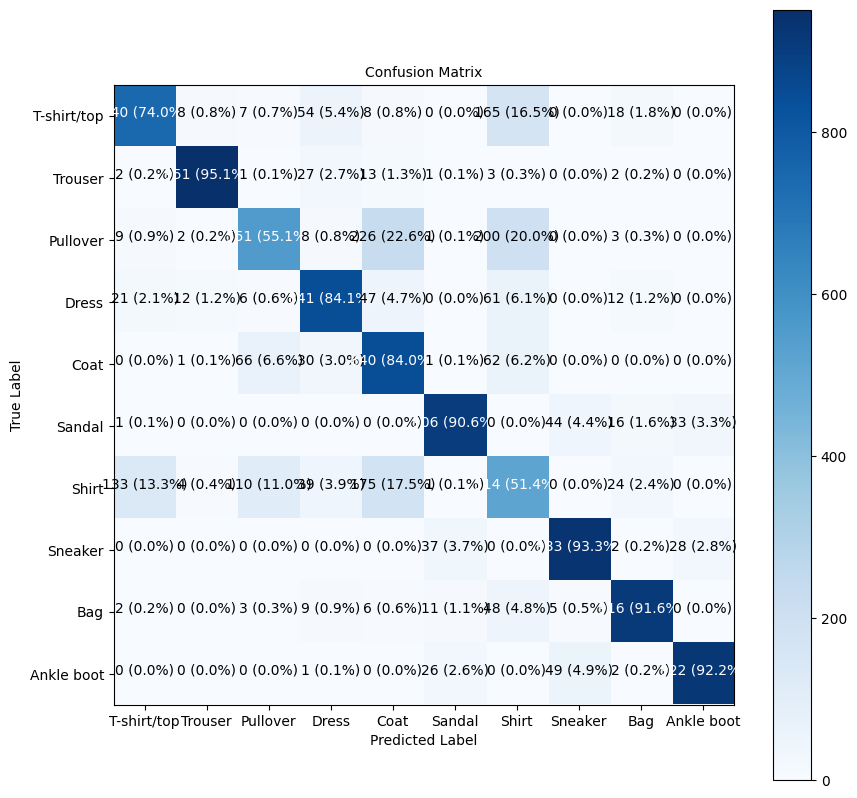

In [91]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(10, 10),
                      text_size=10)

Video N°102: Multi-class classification part 9: Visualising random model predictions

> 🔑 **Note:** Often when working images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models.

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label

In [112]:
from MachineLearningUtils.data_visualization.prediction_visualization import predict_random_image

1/1 [==============================] - 0s 38ms/step


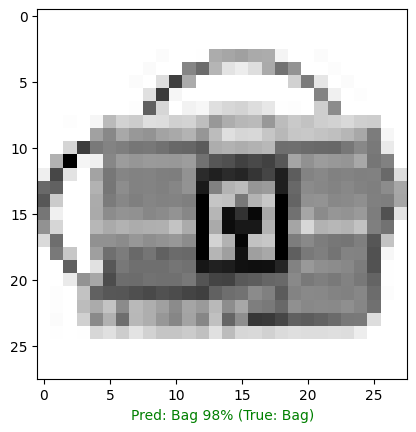

In [115]:
# Check out a random image as well as its prediction
predict_random_image(model=model_14,
                  images=test_data_norm, # always make predictions on the same
                  # kind of data your model was trained on
                  true_labels=test_labels,
                  classes=class_names)

Video N°103: What "patterns" is our model learning?

## What patterns is our model learning?

In [116]:
# Find the layers of our most recent model
model_14.layers

In [117]:
# Extract a particular layer
model_14.layers[1]

In [119]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[-0.3635804 ,  0.6907171 ,  0.48513946,  0.37639967],
        [-0.6673538 ,  1.2660843 ,  0.75961465,  0.12581508],
        [-0.78485996,  0.05514956,  0.00985399,  0.57034314],
        ...,
        [ 0.08331758,  0.12781648,  0.81542206, -0.00493792],
        [-0.937156  ,  0.175821  ,  1.0156881 ,  0.53213286],
        [ 0.00279435,  0.22926827,  0.40497965, -0.05620512]],
       dtype=float32),
 (784, 4))

In [120]:
model_14.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 4)                 3140      
                                                                 
 dense_36 (Dense)            (None, 4)                 20        
                                                                 
 dense_37 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Now let's check out the bias vector...

In [122]:
# Bias and biases shapes
biases, biases.shape

(array([0.92625606, 0.621482  , 1.1304759 , 0.7023769 ], dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector get initialized as zeros (at least in the case of a TensorFlow Dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [123]:
model_14.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 4)                 3140      
                                                                 
 dense_36 (Dense)            (None, 4)                 20        
                                                                 
 dense_37 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


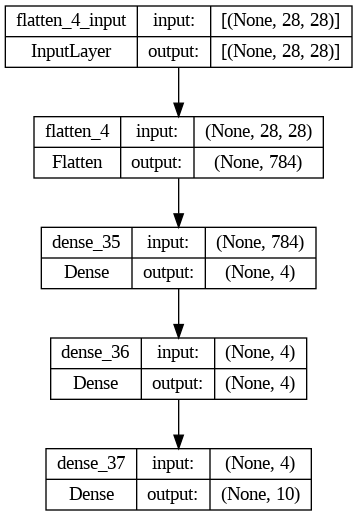

In [126]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)

# Next: check out exercises and extra curriculum...